# MILESTONE 5. PROBLEMA DE LOS N-CUERPOS

$$
\frac{d\mathbf{r}_i}{dt} = \mathbf{v}_i,
\qquad
\frac{d\mathbf{v}_i}{dt} = \mathbf{a}_i,
\qquad
i = 1,\ldots, N_b
$$

$$
U =
\begin{pmatrix}
\mathbf{r}_1 \\[3pt]
\mathbf{v}_1 \\[3pt]
\mathbf{r}_2 \\[3pt]
\mathbf{v}_2 \\[3pt]
\vdots \\[3pt]
\mathbf{r}_{N_b} \\[3pt]
\mathbf{v}_{N_b}
\end{pmatrix}
$$

$$
\frac{dU}{dt}
=
F(U,t)
=
\begin{pmatrix}
\mathbf{v}_1 \\[3pt]
\mathbf{a}_1 \\[3pt]
\mathbf{v}_2 \\[3pt]
\mathbf{a}_2 \\[3pt]
\vdots \\[3pt]
\mathbf{v}_{N_b} \\[3pt]
\mathbf{a}_{N_b}
\end{pmatrix}
$$


In [49]:
import numpy as np
from temporal_schemes_v2 import (step_euler, step_inverse_euler, step_crank_nicholson, step_rk4, Leap_Frog)
import matplotlib.pyplot as plt

def F_ncuerpos(U, t, cuerpos):


    G = 6.67430e-11    # Cambio el valor de G para que en la simulación 3D avance todo más rapido
    G = 1 
    # El vector cuerpos contiene las masas de los cuerpos

    N_cuerpos = len(cuerpos)
    U=U.reshape(2*N_cuerpos, 3)

    r = U[0::2]
    v = U[1::2]

    a = np.zeros_like(r) # Aceleración

    for i in range(N_cuerpos):
        for j in range(N_cuerpos):
            if i != j:
                rij = r[j] - r[i]
                dist3 = np.linalg.norm(rij)**3
                a[i] += G * cuerpos[j] * rij / dist3

    dudt = np.zeros_like(U)
    dudt[0::2] = v
    dudt[1::2] = a

    return dudt.flatten()



def integrar_n_cuerpos(F, U0, T, N, esquema_temporal, cuerpos):
    dt=T/N
    valores_t = np.linspace(0, T, N+1)
    U = np.zeros((N+1, len(U0)))
    U[0] = U0


    for n in range(N):

        U[n+1] = esquema_temporal(lambda U,t: F(U,t, cuerpos), U[n], valores_t[n], dt)


    return valores_t, U 


# Ahora resolvemos el esquema temporal que queramos
# Antes es necesario introducir tanto masas como posiciones iniciales

cuerpos = np.array([1, 0.001, 0.000001])
U0 = np.array([
    0,0,0,   0,0,0,
    1,0,0,   0,1,0,  
    1.1,0,0,   0,1.3,0
])


t, U = integrar_n_cuerpos(F_ncuerpos, U0, T=400, N=30000,
                        esquema_temporal=step_rk4,
                        cuerpos=cuerpos)


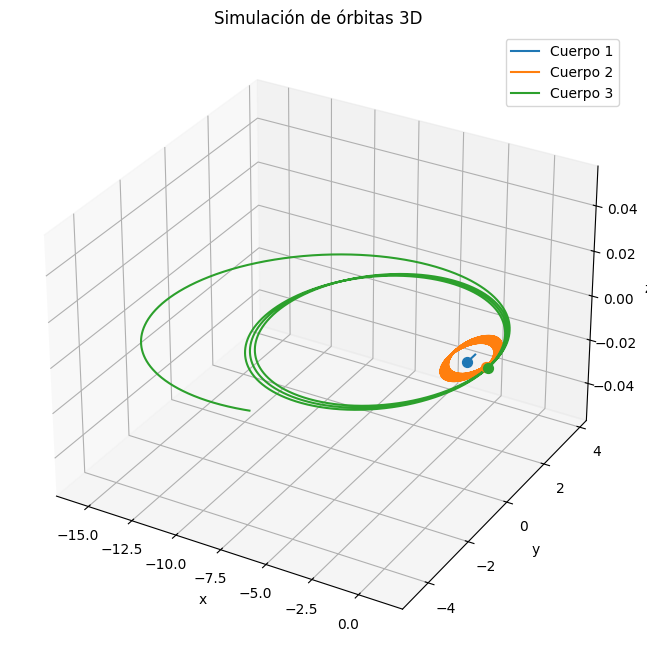

In [50]:
# SIMULACION

from mpl_toolkits.mplot3d import Axes3D

def plot_orbits_3D(U, cuerpos):
    N = len(cuerpos)
    pasos = U.shape[0]
    U_reshaped = U.reshape(pasos, 2*N, 3)
    R = U_reshaped[:, 0::2, :]

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(N):
        ax.plot(R[:, i, 0], R[:, i, 1], R[:, i, 2], label=f"Cuerpo {i+1}")
        ax.scatter(R[0, i, 0], R[0, i, 1], R[0, i, 2], s=50)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    ax.set_title("Simulación de órbitas 3D")
    plt.show()

plot_orbits_3D(U, cuerpos)